<a href="https://colab.research.google.com/github/arsyaamalia/content-based-recommendation-systems/blob/main/Skripsi_Content_Based_Recommendation_System_Eventhings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. INTRODUCTION**

*   ## **What is a Content-Based Recommendation System?**
A content-based recommendation system recommends items to users based on the content or characteristics of the items. This type of recommendation system focuses on understanding the properties of items and learning user preferences from the items they have interacted with in the past.

*   ## **How Does it Work?**
The working principle of a content-based recommendation system can be summarized in a few steps:
1.   Feature Extraction: Extract relevant features from the items. For example, in a movie recommendation system, features could include genre, director, actors, and plot keywords.
2.   User Profile: Create a user profile based on their interactions with items. This profile is essentially a summary of the features of items the user has liked or interacted with in the past.
3.   Recommendation: Calculate the similarity between the user profile and each item's features. Items that are most similar to the user profile are recommended.

---

# **2. EXPLORATORY DATA ANALYSIS (EDA)**

## **Import Python Libraries**

The first step involved in ML using python is understanding and playing around with our data using libraries. Here is the [link](https://docs.google.com/spreadsheets/d/1eilNwyFzBFAzO2Z3vOJoqV7UGN6xBc65aOkLJ5nSdmA/edit?usp=sharing) to the dataset.

Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.

In [16]:
# Import needed modules
import numpy as np
import pandas as pd
import nltk
import re
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform

## **Reading Dataset**

The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the read_csv() function, data can be converted to a pandas DataFrame.

I will use a dataset containing event services/vendor information, including names, categories, locations, and descriptions.

In [17]:
# Read data
df = pd.read_csv('/content/Indonesia_Event_Service_Businesses.csv')

### **Analyzing the Data**

Before we make any inferences, we listen to our data by examining all variables in the data.

The main goal of data understanding is to gain general insights about the data, which covers the number of rows and columns, values in the data, datatypes, and Missing values in the dataset.

shape – shape will display the number of observations(rows) and features(columns) in the dataset

There are 3462 observations and 6 variables in our dataset

In [18]:
# printing the first 5 rows of the dataframe
df.head()

,no,kategori,subkategori,location/city,nama,deskripsi,address,contact,url,lat,lng
0,1,Media Partner,Karir,-,Glints,Glints adalah platform karier yang menghubungk...,NaN,NaN,NaN,NaN,NaN
1,2,Media Partner,Karir,-,Kata.ai,Kata.ai adalah perusahaan teknologi yang menge...,NaN,NaN,NaN,NaN,NaN
2,3,Media Partner,Karir,-,Talent Alpha,Talent Alpha adalah platform yang membantu per...,NaN,NaN,NaN,NaN,NaN
3,4,Media Partner,Karir,-,Ruangguru,Ruangguru adalah platform pendidikan yang meny...,NaN,NaN,NaN,NaN,NaN
4,5,Media Partner,Karir,-,HarukaEdu,HarukaEdu adalah platform e-learning yang meny...,NaN,NaN,NaN,NaN,NaN


In [19]:
# printing the last 5 rows of the dataframe
df.tail()

,no,kategori,subkategori,location/city,nama,deskripsi,address,contact,url,lat,lng
3457,3458,Equipment/Rental,Tent,semarang,Sewa Alat Camping Semarang WB OUTDOOR,NaN,Jl. Taman Suryokusumo IV Pasar PKL Selter 1 Bl...,0877-8910-5550,https://maps.google.com/?cid=13343807366684347718,-6.978405,110.464499
3458,3459,Equipment/Rental,Tent,semarang,Kafe tenda,NaN,"Jl. Pahlawan No.2, Mugassari, Kec. Semarang Se...",NaN,https://maps.google.com/?cid=6253221563540260196,-6.996881,110.419691
3459,3460,Equipment/Rental,Tent,semarang,EnergyAdventure Rental Tenda Alat Outdoor,NaN,"Jl. Brobudur Barat V/25 RT8/13, Kalipancur, Ke...",0819-0265-6457,https://maps.google.com/?cid=12486700668638141432,-6.999503,110.368743
3460,3461,Equipment/Rental,Tent,semarang,Warung tenda muda,NaN,"XFC5+JVC, Jl. Sambiroto VII, Sambiroto, Kec. T...",0858-7620-0035,https://maps.google.com/?cid=10406616885502580166,-7.028391,110.459647
3461,3462,Equipment/Rental,Tent,semarang,"Grosir Tenda lipat Murah ""AMIRA TENT""",NaN,"masjid baiturahim, Tawang Rajekwesi belakang N...",0882-2730-8407,https://maps.google.com/?cid=9508086783357841356,-6.972278,110.390687


**info()** helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3462 entries, 0 to 3461
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   no             3462 non-null   int64  
 1   kategori       3462 non-null   object 
 2   subkategori    3462 non-null   object 
 3   location/city  3462 non-null   object 
 4   nama           3462 non-null   object 
 5   deskripsi      662 non-null    object 
 6   address        2799 non-null   object 
 7   contact        2549 non-null   object 
 8   url            2799 non-null   object 
 9   lat            2799 non-null   float64
 10  lng            2799 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 297.6+ KB


### **Wordcloud**

A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.

In [21]:
dftranspose = pd.DataFrame(df['deskripsi'])

# Transpose the column to a row (excluding the column name)
transposed = dftranspose.T.reset_index(drop=True)

# Export the transposed row to a TXT file
transposed.to_csv('output.txt', index=False, header=False)

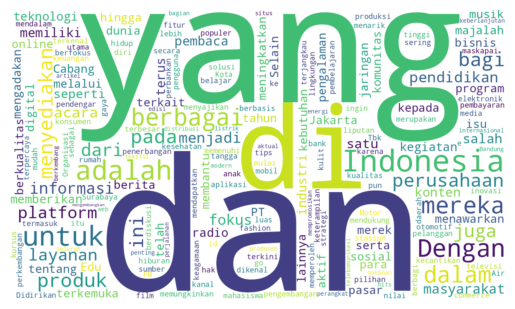

In [22]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

#Importing Dataset
TXT_FILE = "output.txt"

#Creating the text variable
text = open(TXT_FILE, mode="r", encoding="utf-8").read()

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white', height=700, width=1200).generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# store to file
word_cloud.to_file("wordcloud_output.png")

### **Check for Duplication**

**nunique()** based on several unique values in each column and the data description, we can identify the continuous and categorical columns in the data. Duplicated data can be handled or removed based on further analysis

In [23]:
df.nunique()

no               3462
kategori            3
subkategori        29
location/city      13
nama             3125
deskripsi         658
address          2469
contact          2191
url              2484
lat              2476
lng              2475
dtype: int64

### **Missing Values Calculation**

**isnull()** is widely been in all pre-processing steps to identify null values in the data

In our example, **df.isnull().sum()** is used to get the number of missing records in each column

In [24]:
df.isnull().sum()

no                  0
kategori            0
subkategori         0
location/city       0
nama                0
deskripsi        2800
address           663
contact           913
url               663
lat               663
lng               663
dtype: int64

## **Data Reduction**

Some columns or variables can be dropped if they do not add value to our analysis.

In our dataset, the column address, contact, url, lat, lng, assuming they don’t have any predictive power to predict the dependent variable.

In [25]:
# Remove address, contact, url, lat, lng columns from df
df = df.drop(['address','contact','url','lat','lng'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3462 entries, 0 to 3461
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   no             3462 non-null   int64 
 1   kategori       3462 non-null   object
 2   subkategori    3462 non-null   object
 3   location/city  3462 non-null   object
 4   nama           3462 non-null   object
 5   deskripsi      662 non-null    object
dtypes: int64(1), object(5)
memory usage: 162.4+ KB


We start our Feature Engineering as we need to add some columns required for analysis.

## **Feature Engineering**

Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

We will extract relevant features from the dataset, such as kategori, subkategori, location/city, nama, and deskripsi.

In [26]:
# Selecting the relevant features for recommendation
selected_features = ['kategori','subkategori','location/city','nama','deskripsi']
print(selected_features)

['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']


# **3. PRE-PROCESSING DATA**

Data preprocessing is the process of transforming raw data into an understandable format. It is also an important step in data mining as we cannot work with raw data. The quality of the data should be checked before applying machine learning or data mining algorithms.

## **Data Cleaning**

Data cleaning is the process of removing incorrect data, incomplete data, and inaccurate data from the datasets, and it also replaces the missing values.

### **Handling Missing Values**

We will replace all the missing values with null string (found 2800 missing values in deskripsi column before)

In [27]:
# Replacing the null valuess with null string
for feature in selected_features:
    df[feature] = df[feature].fillna('')

### **Data Integration**

We will combine 5 features that are valuable to make a machine learning algorithm

In [28]:
# combining all the 5 selected features
combined_features = df['kategori'] + ' ' + df['subkategori'] + ' ' + df['location/city'] + ' ' + df['nama'] + ' ' + df['deskripsi']
combined_features

0       Media Partner Karir - Glints Glints adalah pla...
1       Media Partner Karir - Kata.ai Kata.ai adalah p...
2       Media Partner Karir - Talent Alpha Talent Alph...
3       Media Partner Karir - Ruangguru Ruangguru adal...
4       Media Partner Karir - HarukaEdu HarukaEdu adal...
                              ...                        
3457    Equipment/Rental Tent semarang Sewa Alat Campi...
3458           Equipment/Rental Tent semarang Kafe tenda 
3459    Equipment/Rental Tent semarang EnergyAdventure...
3460    Equipment/Rental Tent semarang Warung tenda muda 
3461    Equipment/Rental Tent semarang Grosir Tenda li...
Length: 3462, dtype: object

In [29]:
# push to df
df = df.assign(combined_features=combined_features)
df.head()

,no,kategori,subkategori,location/city,nama,deskripsi,combined_features
0,1,Media Partner,Karir,-,Glints,Glints adalah platform karier yang menghubungk...,Media Partner Karir - Glints Glints adalah pla...
1,2,Media Partner,Karir,-,Kata.ai,Kata.ai adalah perusahaan teknologi yang menge...,Media Partner Karir - Kata.ai Kata.ai adalah p...
2,3,Media Partner,Karir,-,Talent Alpha,Talent Alpha adalah platform yang membantu per...,Media Partner Karir - Talent Alpha Talent Alph...
3,4,Media Partner,Karir,-,Ruangguru,Ruangguru adalah platform pendidikan yang meny...,Media Partner Karir - Ruangguru Ruangguru adal...
4,5,Media Partner,Karir,-,HarukaEdu,HarukaEdu adalah platform e-learning yang meny...,Media Partner Karir - HarukaEdu HarukaEdu adal...


### **Remove Special Characters**

In [30]:
def cleaning(Text):
    Text = re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+',' ',Text)
    return Text

df['cleaning'] = df['combined_features'].apply(cleaning)

## **Case Folding**

In this step data was collected are uniform cases or letters contained in each profile. Uniformizing letters was done from capital letters converted to lowercase letters.

In [31]:
df['case_folding'] = df['cleaning'].str.lower()

## **Tokenization**

In this step, the text is split into smaller units. We can use either sentence tokenization or word tokenization based on our problem statement.

In [32]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

df['tokenization']= df['case_folding'].apply(tokenization)

## **Stopword Removal**

Stopwords are the commonly used words and are removed from the text as they do not add any value to the analysis. These words carry less or no meaning.

In [33]:
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&', 'yah', 'no', 'je', 'om', 'pru', 'sch',
                       'injirrr', 'ah', 'oena', 'bu', 'eh', 'n', 'anjir', 'jd', 'anj'])

list_stopwords = set(list_stopwords)

def stopwords_removal(Text):
  words = Text.split()
  return [word for word in words if word not in list_stopwords]

df['stopword_removal'] = df['case_folding'].apply(stopwords_removal)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Stemming**

It is also known as the text standardization step where the words are stemmed or diminished to their root/base form.  For example, words like ‘programmer’, ‘programming, ‘program’ will be stemmed to ‘program’.

In [34]:
!pip install swifter
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import swifter

#buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stemmed wrapper
def stemmed_wrapper(term):
  return stemmer.stem(term)

term_dict = {}

for Text in df['stopword_removal']:
  for term in Text:
    if term not in term_dict:
      term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

#memmulai stemming
def apply_stemmed_term(Text):
  return [term_dict[term] for term in Text]

df['stemming'] = df['stopword_removal'].swifter.apply(apply_stemmed_term)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=1e50eb070782f7e39397007161eca8da5bd71df9cc4644c22b61d7c865e7a93c
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00
4882
------------------------
media : media
partner : partner
karir : karir
glints : glints
platform : platform
karier : karier
menghubungkan : hubung
individu : individu
peluang : peluang
pengembangan : kembang
profesional : profesional
asia : asia
tenggara : tenggara
ai : ai
perusahaan : usaha
teknologi : teknologi
mengembangkan : kembang
solusi : solusi
berbasis : bas
pelatihan : latih
karyawan : karyawan
talent : talent
alpha : alpha
membantu : bantu
menemukan : temu
mengelola : kelola
bakat : bakat
rua

Pandas Apply:   0%|          | 0/3462 [00:00<?, ?it/s]

In [35]:
# stemming
stemming = df[['stemming']]

def fit_stemming(text):
    text = np.array(text)
    text = ' '.join(text)

    return text

df['stemming'] = df['stemming'].apply(lambda x: fit_stemming(x))
df.head()

,no,kategori,subkategori,location/city,nama,deskripsi,combined_features,cleaning,case_folding,tokenization,stopword_removal,stemming
0,1,Media Partner,Karir,-,Glints,Glints adalah platform karier yang menghubungk...,Media Partner Karir - Glints Glints adalah pla...,Media Partner Karir Glints Glints adalah platf...,media partner karir glints glints adalah platf...,[media partner karir glints glints adalah plat...,"[media, partner, karir, glints, glints, platfo...",media partner karir glints glints platform kar...
1,2,Media Partner,Karir,-,Kata.ai,Kata.ai adalah perusahaan teknologi yang menge...,Media Partner Karir - Kata.ai Kata.ai adalah p...,Media Partner Karir Kata ai Kata ai adalah per...,media partner karir kata ai kata ai adalah per...,[media partner karir kata ai kata ai adalah pe...,"[media, partner, karir, ai, ai, perusahaan, te...",media partner karir ai ai usaha teknologi kemb...
2,3,Media Partner,Karir,-,Talent Alpha,Talent Alpha adalah platform yang membantu per...,Media Partner Karir - Talent Alpha Talent Alph...,Media Partner Karir Talent Alpha Talent Alpha ...,media partner karir talent alpha talent alpha ...,[media partner karir talent alpha talent alpha...,"[media, partner, karir, talent, alpha, talent,...",media partner karir talent alpha talent alpha ...
3,4,Media Partner,Karir,-,Ruangguru,Ruangguru adalah platform pendidikan yang meny...,Media Partner Karir - Ruangguru Ruangguru adal...,Media Partner Karir Ruangguru Ruangguru adalah...,media partner karir ruangguru ruangguru adalah...,[media partner karir ruangguru ruangguru adala...,"[media, partner, karir, ruangguru, ruangguru, ...",media partner karir ruangguru ruangguru platfo...
4,5,Media Partner,Karir,-,HarukaEdu,HarukaEdu adalah platform e-learning yang meny...,Media Partner Karir - HarukaEdu HarukaEdu adal...,Media Partner Karir HarukaEdu HarukaEdu adalah...,media partner karir harukaedu harukaedu adalah...,[media partner karir harukaedu harukaedu adala...,"[media, partner, karir, harukaedu, harukaedu, ...",media partner karir harukaedu harukaedu platfo...


In [36]:
#save clean data
df['stemming'].to_csv('dataclean.csv', sep=',', index=False)

# **4. BUILDING CONTENT-BASED RECOMMENDATION SYSTEMS (CBRS)**

In [37]:
dfclean = pd.read_csv('/content/dataclean.csv')
dfclean.head()

,stemming
0,media partner karir glints glints platform kar...
1,media partner karir ai ai usaha teknologi kemb...
2,media partner karir talent alpha talent alpha ...
3,media partner karir ruangguru ruangguru platfo...
4,media partner karir harukaedu harukaedu platfo...


## **Term Frequency**

The term is frequency measure of a word w in a document (text) d. It is equal to the number of instances of word w in document d divided by the total number of words in document d. Term frequency serves as a metric to determine a word’s occurrence in a document as compared to the total number of words in a document. The denominator is always the same.

### **TF-IDF**

We use TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to convert text features (descriptions) into numerical vectors.
TF-IDF gives more weight to terms that are important in a specific document and less weight to common terms.

In [38]:
# converting the text data to feature vectors
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(dfclean['stemming'])

In [39]:
print(tfidf_matrix)

  (0, 4013)	0.233633278697655
  (0, 368)	0.20663814698142102
  (0, 3211)	0.24057690804475065
  (0, 2017)	0.13889605402704439
  (0, 2959)	0.26863680405895646
  (0, 1748)	0.2206680949885239
  (0, 1684)	0.20964892416243872
  (0, 1972)	0.48930489904748037
  (0, 3081)	0.13362031907780034
  (0, 1498)	0.5852423171883455
  (0, 1974)	0.18646005545066555
  (0, 2928)	0.11626067818192665
  (0, 2489)	0.1125515501660507
  (1, 1982)	0.246839230070228
  (1, 2242)	0.1817339730548012
  (1, 486)	0.1596957433046257
  (1, 3752)	0.17284472759429229
  (1, 3985)	0.13817450778724835
  (1, 4232)	0.11733119947102862
  (1, 150)	0.8066323794612107
  (1, 2017)	0.25525165962221663
  (1, 1972)	0.22480100032005249
  (1, 1974)	0.17133042022117442
  (1, 2928)	0.106827120693303
  (1, 2489)	0.1034189566225683
  :	:
  (3458, 3607)	0.29603903619789024
  (3459, 1218)	0.6667110160923526
  (3459, 2858)	0.4054278928345717
  (3459, 4006)	0.2851169758606136
  (3459, 4017)	0.2564385936221612
  (3459, 3369)	0.19112785380137753
  (3

### **TF-RF**

To implement **Term Frequency-Reversed Frequency (TF-RF)** vectorization, we need to modify the typical TF-IDF approach. In TF-RF, the document frequency is replaced by the "reversed frequency," which measures how often a term does not appear in documents. This can highlight terms that are rare in the dataset overall, but frequent in specific documents.

In [40]:
# Step 1: Calculate Term Frequency (TF)
count_vectorizer = CountVectorizer()
term_counts = count_vectorizer.fit_transform(dfclean['stemming'])

# Convert to array for easier manipulation
term_counts_array = term_counts.toarray()

# Step 2: Calculate Reversed Frequency (RF)
num_docs = term_counts_array.shape[0]
term_presence = term_counts_array > 0
doc_freq = np.sum(term_presence, axis=0)
rev_freq = np.log(num_docs / (doc_freq + 1))  # Add 1 to avoid division by zero

# Step 3: Calculate TF-RF
tf_rf = term_counts_array * rev_freq

# Convert to sparse matrix format (similar to tfidf_matrix)
from scipy.sparse import csr_matrix
tfrf_matrix = csr_matrix(tf_rf)

# Print the resulting TF-RF matrix
print(tfrf_matrix)

  (0, 368)	4.971547905388209
  (0, 1498)	14.912909110352418
  (0, 1684)	5.058559282377839
  (0, 1748)	5.377013013496374
  (0, 1972)	12.140320388112638
  (0, 1974)	4.388401620042592
  (0, 2017)	3.0138032986858927
  (0, 2489)	2.2524478680994138
  (0, 2928)	2.3596415648389013
  (0, 2959)	6.7633073746162635
  (0, 3081)	2.861334705041619
  (0, 3211)	5.952377158399935
  (0, 4013)	5.751706462937784
  (1, 150)	22.369363665528628
  (1, 486)	4.022467350691063
  (1, 1972)	6.070160194056319
  (1, 1974)	4.388401620042592
  (1, 1982)	6.7633073746162635
  (1, 2017)	6.027606597371785
  (1, 2242)	4.715614531251008
  (1, 2489)	2.2524478680994138
  (1, 2928)	2.3596415648389013
  (1, 3752)	4.436029669031846
  (1, 3985)	3.345580691002898
  (1, 4232)	2.690016221591996
  :	:
  (3458, 4017)	2.2524478680994138
  (3459, 199)	3.7428824884719014
  (3459, 1218)	7.456454555176209
  (3459, 1234)	0.2118699604760461
  (3459, 2858)	4.142268550503684
  (3459, 3369)	0.4237399209520922
  (3459, 3607)	2.0696685406405644
  

### **TF-ABS**

To implement **Term Frequency-Absolute Frequency (TF-ABS)** vectorization, we need to adjust the typical TF-IDF approach. In TF-ABS, we combine the term frequency (TF) with the absolute frequency (ABS) which is simply the raw count of terms in the entire corpus.

In [41]:
# Step 1: Calculate Term Frequency (TF)
count_vectorizer = CountVectorizer()
term_counts = count_vectorizer.fit_transform(dfclean['stemming'])

# Convert to array for easier manipulation
term_counts_array = term_counts.toarray()

# Step 2: Calculate Absolute Frequency (ABS)
abs_freq = np.sum(term_counts_array, axis=0)

# Step 3: Combine TF and ABS
# Option 1: Use term frequency directly with absolute frequency
tf_abs = term_counts_array * abs_freq

# Convert to sparse matrix format (similar to tfidf_matrix)
from scipy.sparse import csr_matrix
tfabs_matrix = csr_matrix(tf_abs)

# Print the resulting TF-ABS matrix
print(tfabs_matrix)

  (0, 368)	35
  (0, 1498)	4
  (0, 1684)	21
  (0, 1748)	15
  (0, 1972)	16
  (0, 1974)	42
  (0, 2017)	181
  (0, 2489)	444
  (0, 2928)	326
  (0, 2959)	3
  (0, 3081)	203
  (0, 3211)	9
  (0, 4013)	11
  (1, 150)	9
  (1, 486)	61
  (1, 1972)	8
  (1, 1974)	42
  (1, 1982)	3
  (1, 2017)	362
  (1, 2242)	30
  (1, 2489)	444
  (1, 2928)	326
  (1, 3752)	47
  (1, 3985)	173
  (1, 4232)	315
  :	:
  (3458, 4017)	372
  (3459, 199)	91
  (3459, 1218)	1
  (3459, 1234)	2813
  (3459, 2858)	57
  (3459, 3369)	5848
  (3459, 3607)	585
  (3459, 4006)	283
  (3459, 4017)	372
  (3460, 1234)	2813
  (3460, 2639)	19
  (3460, 3369)	2924
  (3460, 3607)	585
  (3460, 4006)	283
  (3460, 4017)	372
  (3460, 4329)	10
  (3461, 256)	3
  (3461, 1234)	2813
  (3461, 1549)	15
  (3461, 2302)	29
  (3461, 2654)	80
  (3461, 3369)	2924
  (3461, 3607)	585
  (3461, 4006)	283
  (3461, 4017)	744


### **TF-PDF**

To implement Term Frequency-Probabilistic Document Frequency (TF-PDF) vectorization, we need to modify the typical TF-IDF approach. In TF-PDF, the inverse document frequency (IDF) is replaced by the probabilistic document frequency (PDF), which is computed differently to emphasize the probability-based weighting of terms.

In [65]:
# Step 1: Calculate Term Frequency (TF)
count_vectorizer = CountVectorizer()
term_counts = count_vectorizer.fit_transform(dfclean['stemming'])

# Convert to array for easier manipulation
term_counts_array = term_counts.toarray()

# Step 2: Calculate Document Frequency (DF)
num_docs = term_counts_array.shape[0]
term_presence = term_counts_array > 0
doc_freq = np.sum(term_presence, axis=0)

# Step 3: Calculate Probabilistic Document Frequency (PDF)
pdf = np.log((num_docs - doc_freq + 1) / (doc_freq + 1))  # Add 1 to avoid division by zero

# Step 4: Calculate TF-PDF
tf_pdf = term_counts_array * pdf

# Convert to sparse matrix format (similar to tfidf_vectors)
from scipy.sparse import csr_matrix
tfpdf_matrix = csr_matrix(tf_pdf)

# Print the resulting TF-PDF vectors
print(tfpdf_matrix)

  (0, 368)	4.965172920019499
  (0, 1498)	14.912909110352418
  (0, 1684)	5.052765523413169
  (0, 1748)	5.372960909543803
  (0, 1972)	12.136851176488221
  (0, 1974)	4.376488069284043
  (0, 2017)	2.964059473687324
  (0, 2489)	2.142003522836497
  (0, 2928)	2.2610620372934247
  (0, 2959)	6.762729506931879
  (0, 3081)	2.8030542428358753
  (0, 3211)	5.950353158865551
  (0, 4013)	5.749103424591622
  (1, 150)	22.369363665528628
  (1, 486)	4.004984387910715
  (1, 1972)	6.068425588244111
  (1, 1974)	4.376488069284043
  (1, 1982)	6.762729506931879
  (1, 2017)	5.928118947374648
  (1, 2242)	4.707202588972546
  (1, 2489)	2.142003522836497
  (1, 2928)	2.2610620372934247
  (1, 3752)	4.424700571825878
  (1, 3985)	3.3103036644220825
  (1, 4232)	2.620342256614116
  :	:
  (3458, 4017)	2.142003522836497
  (3459, 199)	3.7195032821942724
  (3459, 1218)	7.456454555176209
  (3459, 1234)	-1.440956785074246
  (3459, 2858)	4.126841086905432
  (3459, 3369)	-2.881913570148492
  (3459, 3607)	1.9353941139261286
  (345

## **Similarity Scores**

**Similarity Scores** are based on comparing one data object with another, attribute by attribute, usually summing the squares of the differences in magnitude for each attribute, and using the calculation to compute a final outcome, known as the correlation score.

### **Cosine Similarity**

From this, we can compute a user-user similarity between two users using the cosine similarity formula.

Cosine similarity means the similarity between two vectors of inner product space. It is measured by the cosine of the angle between two non-zero vectors and is used to determine how similar two items are based on their feature vectors.

In [42]:
# getting the similarity scores using cosine similarity with TF-IDF matrix
tfidf_cosine = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [43]:
print(tfidf_cosine)

[[1.         0.20145572 0.20847928 ... 0.         0.         0.        ]
 [0.20145572 1.         0.20553469 ... 0.         0.         0.        ]
 [0.20847928 0.20553469 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.25457875 0.25250108]
 [0.         0.         0.         ... 0.25457875 1.         0.26742162]
 [0.         0.         0.         ... 0.25250108 0.26742162 1.        ]]


In [44]:
# getting the similarity scores using cosine similarity with TF-RF matrix
tfrf_cosine = cosine_similarity(tfrf_matrix, tfrf_matrix)

In [45]:
print(tfrf_cosine)

[[1.         0.1829351  0.18916049 ... 0.         0.         0.        ]
 [0.1829351  1.         0.17657857 ... 0.         0.         0.        ]
 [0.18916049 0.17657857 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.17034281 0.17589739]
 [0.         0.         0.         ... 0.17034281 1.         0.18887126]
 [0.         0.         0.         ... 0.17589739 0.18887126 1.        ]]


In [46]:
# getting the similarity scores using cosine similarity with TF-ABS matrix
tfabs_cosine = cosine_similarity(tfabs_matrix, tfabs_matrix)

In [47]:
print(tfabs_cosine)

[[1.         0.79355612 0.84959176 ... 0.         0.         0.        ]
 [0.79355612 1.         0.91831957 ... 0.         0.         0.        ]
 [0.84959176 0.91831957 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.94868433 0.94220685]
 [0.         0.         0.         ... 0.94868433 1.         0.99582984]
 [0.         0.         0.         ... 0.94220685 0.99582984 1.        ]]


In [66]:
# getting the similarity scores using cosine similarity with TF-PDF matrix
tfpdf_cosine = cosine_similarity(tfpdf_matrix, tfpdf_matrix)

In [67]:
print(tfpdf_cosine)

[[1.         0.18110004 0.18716431 ... 0.         0.         0.        ]
 [0.18110004 1.         0.17392056 ... 0.         0.         0.        ]
 [0.18716431 0.17392056 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.2077235  0.20164091]
 [0.         0.         0.         ... 0.2077235  1.         0.2044209 ]
 [0.         0.         0.         ... 0.20164091 0.2044209  1.        ]]


### **Jaccard Similarity**

In [48]:
# getting the similarity scores using jaccard similarity with TF-IDF matrix
tfidf_binary = (tfidf_matrix > 0).astype(int)
jaccard_distances = pdist(tfidf_binary.toarray(), metric='jaccard')
tfidf_jaccard = 1 - squareform(jaccard_distances)
np.fill_diagonal(tfidf_jaccard, 1.0)

In [49]:
print(tfidf_jaccard)

[[1.         0.25       0.27272727 ... 0.         0.         0.        ]
 [0.25       1.         0.42105263 ... 0.         0.         0.        ]
 [0.27272727 0.42105263 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.5        0.41666667]
 [0.         0.         0.         ... 0.5        1.         0.45454545]
 [0.         0.         0.         ... 0.41666667 0.45454545 1.        ]]


In [50]:
# getting the similarity scores using jaccard similarity with TF-RF matrix
tfrf_binary = (tfrf_matrix > 0).astype(int)
jaccard_distances = pdist(tfrf_binary.toarray(), metric='jaccard')
tfrf_jaccard = 1 - squareform(jaccard_distances)
np.fill_diagonal(tfrf_jaccard, 1.0)

In [51]:
print(tfrf_jaccard)

[[1.         0.25       0.27272727 ... 0.         0.         0.        ]
 [0.25       1.         0.42105263 ... 0.         0.         0.        ]
 [0.27272727 0.42105263 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.5        0.41666667]
 [0.         0.         0.         ... 0.5        1.         0.45454545]
 [0.         0.         0.         ... 0.41666667 0.45454545 1.        ]]


In [52]:
# getting the similarity scores using jaccard similarity with TF-ABS matrix
tfabs_binary = (tfabs_matrix > 0).astype(int)
jaccard_distances = pdist(tfabs_binary.toarray(), metric='jaccard')
tfabs_jaccard = 1 - squareform(jaccard_distances)
np.fill_diagonal(tfabs_jaccard, 1.0)

In [53]:
print(tfabs_jaccard)

[[1.         0.25       0.27272727 ... 0.         0.         0.        ]
 [0.25       1.         0.42105263 ... 0.         0.         0.        ]
 [0.27272727 0.42105263 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.5        0.41666667]
 [0.         0.         0.         ... 0.5        1.         0.45454545]
 [0.         0.         0.         ... 0.41666667 0.45454545 1.        ]]


In [71]:
# getting the similarity scores using jaccard similarity with TF-PDF matrix
tfpdf_binary = (tfpdf_matrix > 0).astype(int)
jaccard_distances = pdist(tfpdf_binary.toarray(), metric='jaccard')
tfpdf_jaccard = 1 - squareform(jaccard_distances)
np.fill_diagonal(tfpdf_jaccard, 1.0)

In [72]:
print(tfpdf_jaccard)

[[1.         0.25       0.27272727 ... 0.         0.         0.        ]
 [0.25       1.         0.42105263 ... 0.         0.         0.        ]
 [0.27272727 0.42105263 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.375      0.3       ]
 [0.         0.         0.         ... 0.375      1.         0.33333333]
 [0.         0.         0.         ... 0.3        0.33333333 1.        ]]


## **Test Recommendation System**

In [97]:
# creating a list with all the event service names given in the dataset

list_of_all_names = df['nama'].tolist()
print(list_of_all_names)

['Glints', 'Kata.ai', 'Talent Alpha', 'Ruangguru', 'HarukaEdu', 'Pintaria', 'Sekolahmu', 'Skill Academy', 'Hacktiv8', 'Labster Indonesia', 'Eduplus', 'Sekolah Coding', 'Quipper', 'Talenta', 'Code Margonda', 'KodeKiddo', 'Inspigo', 'Tokopedia Academy', 'Hacktiv8 Indonesia', 'Akseleran', 'Kiddo Programming', 'Cakap', 'Disdus', 'Indotrading.com Academy', 'Urbanhire', 'Codemi', 'IDN Media Academy', 'Batavocational', 'Zenius', 'IndonesiaX', 'Pinhome Academy', 'STMIK Jakarta', 'Mirai Academy', 'Genius English Academy', 'Agate Academy', 'Skilvul', 'Tinkerjoy', 'Finansialku Academy', 'Cognitivo Academy', 'English Today Academy', 'Inflearn Academy', 'Kompetisi Plus', "Jakarta Women's Network", 'Indonesian Young Entrepreneurs Association (IYEA)', 'Jakarta Foodies Club', 'Indonesian Photographers Society', 'Jakarta Cycling Club', 'Indonesian Writers Community', 'Jakarta Vegan Society', 'Indonesian Tech Enthusiasts', 'Jakarta Book Club', 'Indonesian Film Society', 'Jakarta Green Living Community',

In [98]:
# getting the event service name from the user
eventservice_name = input(' Enter your favourite event service name: ')

 Enter your favourite event service name: zenius


In [99]:
# finding the close match for the event service name given by the user
find_close_match = difflib.get_close_matches(eventservice_name, list_of_all_names)
print(find_close_match)

['Zenius', 'Zenius', 'Jenius']


In [100]:
# finding the index of the event service with name
close_match = find_close_match[0]
index_of_the_eventservice = df[df.nama == close_match]['no'].values[0]

### **A list of similar event services with various scenarios**

In [101]:
# SCENARIO 1: TF-IDF with Cosine Similarity
tfidf_cosine_score = list(enumerate(tfidf_cosine[index_of_the_eventservice]))
print(tfidf_cosine_score)

[(0, 0.08581874786821929), (1, 0.06098976617760972), (2, 0.08214316840328799), (3, 0.24260079733098194), (4, 0.1759341323115411), (5, 0.21068782122036064), (6, 0.2533720644193149), (7, 0.22280942910555981), (8, 0.08887569381622026), (9, 0.1952171504455195), (10, 0.26995499982617743), (11, 0.07320537219121408), (12, 0.27110694894578935), (13, 0.09378248851096224), (14, 0.10208054033588845), (15, 0.07487314143418813), (16, 0.23625569029312143), (17, 0.22447423184062087), (18, 0.15918254419646724), (19, 0.15107355983596885), (20, 0.06239177176006651), (21, 0.20714025273433737), (22, 0.17763611344307922), (23, 0.1952358867495783), (24, 0.1174125465782036), (25, 0.27238113140633563), (26, 0.240677104822247), (27, 0.1383740041904839), (28, 0.2671145400431426), (29, 1.0000000000000002), (30, 0.2061006000013975), (31, 0.17532705982417854), (32, 0.13351825886214877), (33, 0.10234345403031314), (34, 0.19872896394429931), (35, 0.26917144304009255), (36, 0.13280358828192163), (37, 0.22687117903791

In [102]:
# SCENARIO 2: TF-RF with Cosine Similarity
tfrf_cosine_score = list(enumerate(tfrf_cosine[index_of_the_eventservice]))
print(tfrf_cosine_score)

[(0, 0.06825863591611549), (1, 0.04914452723835561), (2, 0.0652116647873332), (3, 0.20920470874487718), (4, 0.14519242678483205), (5, 0.17568961694245175), (6, 0.2171734117645958), (7, 0.19232914430078174), (8, 0.06960816572779423), (9, 0.15242693462748957), (10, 0.2305033011792708), (11, 0.06016970237232937), (12, 0.2317767615330606), (13, 0.07527115151273721), (14, 0.08643416800223803), (15, 0.06146678751580303), (16, 0.19728193538769997), (17, 0.19065427946797336), (18, 0.12820347486659642), (19, 0.12049176048325216), (20, 0.05023685044898086), (21, 0.17183110014802924), (22, 0.14676980245158405), (23, 0.16423698219717742), (24, 0.09151680543614397), (25, 0.23415767569381957), (26, 0.2019633681746229), (27, 0.11457232904799074), (28, 0.2260908200038718), (29, 1.0000000000000002), (30, 0.1717247107305588), (31, 0.15260858005368175), (32, 0.11256630302713842), (33, 0.08472397818780561), (34, 0.16529448535392838), (35, 0.2309612738729362), (36, 0.11175385941660138), (37, 0.193454342438

In [103]:
# SCENARIO 3: TF-ABS with Cosine Similarity
tfabs_cosine_score = list(enumerate(tfabs_cosine[index_of_the_eventservice]))
print(tfabs_cosine_score)

[(0, 0.4825271739736885), (1, 0.34708660349022863), (2, 0.4123787763297971), (3, 0.5290972970286982), (4, 0.5699323051884557), (5, 0.5789890833199515), (6, 0.5896973847532299), (7, 0.5010456251416664), (8, 0.5371787477218828), (9, 0.9487762435577463), (10, 0.5915525558155026), (11, 0.3915969140083845), (12, 0.5915606168754687), (13, 0.42550807546676744), (14, 0.4263152009354648), (15, 0.42155657508166566), (16, 0.5922524254565378), (17, 0.5711187166825392), (18, 0.9249632849570695), (19, 0.5767471770448863), (20, 0.43514914309472996), (21, 0.5921434864363013), (22, 0.5694627044456712), (23, 0.5834678529599965), (24, 0.5385607093897906), (25, 0.5586556381352933), (26, 0.5051218408463025), (27, 0.5420640981490774), (28, 0.5841639135106149), (29, 1.0), (30, 0.5907240771735345), (31, 0.2233890960808516), (32, 0.5232720445055132), (33, 0.5395376326481548), (34, 0.5906975876803444), (35, 0.5758182313400608), (36, 0.5371224615687289), (37, 0.585544489626541), (38, 0.5052046995104453), (39, 0.

In [104]:
# SCENARIO 4: TF-PDF with Cosine Similarity
tfpdf_cosine_score = list(enumerate(tfpdf_cosine[index_of_the_eventservice]))
print(tfpdf_cosine_score)

[(0, 0.06610502359616309), (1, 0.04767823120800574), (2, 0.06318104082718486), (3, 0.2058453986519043), (4, 0.14175777273806545), (5, 0.17190644783524275), (6, 0.21313542830395532), (7, 0.1896931028575309), (8, 0.06708200704505655), (9, 0.14680990630465557), (10, 0.2268560376459848), (11, 0.05839847794853804), (12, 0.22811696814590707), (13, 0.07295963072619009), (14, 0.08486311180994188), (15, 0.05964917284056678), (16, 0.1933902365063237), (17, 0.18696031435603216), (18, 0.1236263372747976), (19, 0.11682034441612234), (20, 0.048703517786485684), (21, 0.16829520798059355), (22, 0.1433189937546267), (23, 0.1608978898252881), (24, 0.08827503308560236), (25, 0.23059549378943758), (26, 0.19717154137489348), (27, 0.11194954357803676), (28, 0.22208975839302922), (29, 1.0000000000000002), (30, 0.1682123875935526), (31, 0.15049345192269517), (32, 0.11003734356660044), (33, 0.0827140644007314), (34, 0.16188030803327141), (35, 0.22738424990773196), (36, 0.10923959201476635), (37, 0.189696900008

In [105]:
# SCENARIO 5: Term Weighting with Jaccard Similarity
tfidf_jaccard_score = list(enumerate(tfidf_jaccard[index_of_the_eventservice]))
print(tfidf_jaccard_score)

#SAME RESULT:

# tfrf_jaccard_score = list(enumerate(tfrf_jaccard[index_of_the_eventservice]))
# print(tfrf_jaccard_score)

# tfabs_jaccard_score = list(enumerate(tfabs_jaccard[index_of_the_eventservice]))
# print(tfabs_jaccard_score)

[(0, 0.19047619047619047), (1, 0.1428571428571429), (2, 0.17391304347826086), (3, 0.38888888888888884), (4, 0.3529411764705882), (5, 0.4117647058823529), (6, 0.4444444444444444), (7, 0.38888888888888884), (8, 0.19047619047619047), (9, 0.4444444444444444), (10, 0.5), (11, 0.13636363636363635), (12, 0.5), (13, 0.19999999999999996), (14, 0.18181818181818177), (15, 0.1428571428571429), (16, 0.47058823529411764), (17, 0.4444444444444444), (18, 0.30000000000000004), (19, 0.3157894736842105), (20, 0.1428571428571429), (21, 0.47058823529411764), (22, 0.3529411764705882), (23, 0.42105263157894735), (24, 0.26315789473684215), (25, 0.47058823529411764), (26, 0.47058823529411764), (27, 0.26315789473684215), (28, 0.5), (29, 1.0), (30, 0.4444444444444444), (31, 0.25), (32, 0.25), (33, 0.23809523809523814), (34, 0.42105263157894735), (35, 0.47058823529411764), (36, 0.25), (37, 0.4444444444444444), (38, 0.23809523809523814), (39, 0.23809523809523814), (40, 0.47058823529411764), (41, 0.4444444444444444

### **Sorting the event services based on their similarity score**

In [106]:
# SCENARIO 1
sorted_similar_eventservices1 = sorted(tfidf_cosine_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_eventservices1)

[(29, 1.0000000000000002), (434, 0.5119139927993411), (219, 0.33254793357380535), (25, 0.27238113140633563), (12, 0.27110694894578935), (10, 0.26995499982617743), (35, 0.26917144304009255), (28, 0.2671145400431426), (6, 0.2533720644193149), (3, 0.24260079733098194), (26, 0.240677104822247), (16, 0.23625569029312143), (37, 0.22687117903791731), (17, 0.22447423184062087), (7, 0.22280942910555981), (40, 0.2141562245967475), (5, 0.21068782122036064), (41, 0.20949642322002232), (21, 0.20714025273433737), (30, 0.2061006000013975), (34, 0.19872896394429931), (23, 0.1952358867495783), (9, 0.1952171504455195), (22, 0.17763611344307922), (4, 0.1759341323115411), (31, 0.17532705982417854), (449, 0.16521176980905236), (431, 0.1596959078606162), (18, 0.15918254419646724), (433, 0.156632160391347), (19, 0.15107355983596885), (430, 0.1509550885636341), (444, 0.1462018627741473), (2289, 0.14582998213149811), (27, 0.1383740041904839), (445, 0.1362631080311947), (441, 0.1343258712997568), (32, 0.1335182

In [107]:
top_sim1 = sorted_similar_eventservices1[:10]
top_sim1

[(29, 1.0000000000000002),
 (434, 0.5119139927993411),
 (219, 0.33254793357380535),
 (25, 0.27238113140633563),
 (12, 0.27110694894578935),
 (10, 0.26995499982617743),
 (35, 0.26917144304009255),
 (28, 0.2671145400431426),
 (6, 0.2533720644193149),
 (3, 0.24260079733098194)]

In [108]:
# SCENARIO 2
sorted_similar_eventservices2 = sorted(tfrf_cosine_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_eventservices2)

[(29, 1.0000000000000002), (434, 0.4972215475010656), (219, 0.3357865584168824), (25, 0.23415767569381957), (12, 0.2317767615330606), (35, 0.2309612738729362), (10, 0.2305033011792708), (28, 0.2260908200038718), (6, 0.2171734117645958), (3, 0.20920470874487718), (26, 0.2019633681746229), (16, 0.19728193538769997), (37, 0.1934543424380582), (7, 0.19232914430078174), (17, 0.19065427946797336), (40, 0.1787936614400585), (5, 0.17568961694245175), (41, 0.17539182204034143), (21, 0.17183110014802924), (30, 0.1717247107305588), (34, 0.16529448535392838), (23, 0.16423698219717742), (31, 0.15260858005368175), (9, 0.15242693462748957), (22, 0.14676980245158405), (4, 0.14519242678483205), (449, 0.1433029044704854), (433, 0.138453350158301), (2289, 0.13711209423595747), (431, 0.1312804072785851), (18, 0.12820347486659642), (444, 0.12626230949595665), (430, 0.12133066329825978), (19, 0.12049176048325216), (441, 0.11802611699776554), (27, 0.11457232904799074), (445, 0.11399184657863158), (442, 0.113

In [109]:
top_sim2 = sorted_similar_eventservices2[:10]
top_sim2

[(29, 1.0000000000000002),
 (434, 0.4972215475010656),
 (219, 0.3357865584168824),
 (25, 0.23415767569381957),
 (12, 0.2317767615330606),
 (35, 0.2309612738729362),
 (10, 0.2305033011792708),
 (28, 0.2260908200038718),
 (6, 0.2171734117645958),
 (3, 0.20920470874487718)]

In [110]:
# SCENARIO 3
sorted_similar_eventservices3 = sorted(tfabs_cosine_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_eventservices3)

[(29, 1.0), (9, 0.9487762435577463), (297, 0.9378579378286286), (318, 0.9274385873996377), (67, 0.9257495288925585), (18, 0.9249632849570695), (142, 0.9248951707752413), (293, 0.9213789642473464), (301, 0.9129541513277958), (152, 0.9100293334892054), (294, 0.9085903350511929), (155, 0.9069129853114691), (306, 0.9067008667027223), (325, 0.9059686409534105), (323, 0.9057460155112708), (131, 0.9008753612079328), (303, 0.9007361113742608), (322, 0.9004696190276188), (182, 0.8995610278778825), (144, 0.8984264464342695), (43, 0.8974722537983327), (312, 0.892976491459196), (313, 0.891965788277436), (69, 0.8916797430499537), (175, 0.8891792341561199), (128, 0.8871294750413384), (162, 0.8836469637632659), (84, 0.8814979246700343), (310, 0.8803055297576754), (181, 0.8801851928013891), (256, 0.8794784296919058), (45, 0.8769602711139612), (47, 0.8769443652723439), (81, 0.8767559306061973), (55, 0.8759585164934641), (53, 0.8749088662917146), (299, 0.874891628081755), (79, 0.8737346889252086), (307,

In [111]:
top_sim3 = sorted_similar_eventservices3[:10]
top_sim3

[(29, 1.0),
 (9, 0.9487762435577463),
 (297, 0.9378579378286286),
 (318, 0.9274385873996377),
 (67, 0.9257495288925585),
 (18, 0.9249632849570695),
 (142, 0.9248951707752413),
 (293, 0.9213789642473464),
 (301, 0.9129541513277958),
 (152, 0.9100293334892054)]

In [112]:
# SCENARIO 4
sorted_similar_eventservices4 = sorted(tfpdf_cosine_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_eventservices4)

[(29, 1.0000000000000002), (434, 0.49610156812983364), (219, 0.3351372921334753), (25, 0.23059549378943758), (12, 0.22811696814590707), (35, 0.22738424990773196), (10, 0.2268560376459848), (28, 0.22208975839302922), (6, 0.21313542830395532), (3, 0.2058453986519043), (26, 0.19717154137489348), (16, 0.1933902365063237), (37, 0.18969690000835301), (7, 0.1896931028575309), (17, 0.18696031435603216), (40, 0.17517637897974267), (5, 0.17190644783524275), (41, 0.17181687051128947), (21, 0.16829520798059355), (30, 0.1682123875935526), (34, 0.16188030803327141), (23, 0.1608978898252881), (31, 0.15049345192269517), (9, 0.14680990630465557), (22, 0.1433189937546267), (4, 0.14175777273806545), (449, 0.14166255715356593), (433, 0.13743031984813422), (431, 0.12844141482651056), (2289, 0.1280476184565166), (444, 0.12472037334376944), (18, 0.1236263372747976), (430, 0.11808398666802349), (19, 0.11682034441612234), (441, 0.1166579505962003), (27, 0.11194954357803676), (442, 0.11184317565664134), (445, 0

In [113]:
top_sim4 = sorted_similar_eventservices4[:10]
top_sim4

[(29, 1.0000000000000002),
 (434, 0.49610156812983364),
 (219, 0.3351372921334753),
 (25, 0.23059549378943758),
 (12, 0.22811696814590707),
 (35, 0.22738424990773196),
 (10, 0.2268560376459848),
 (28, 0.22208975839302922),
 (6, 0.21313542830395532),
 (3, 0.2058453986519043)]

In [114]:
# SCENARIO 5
sorted_similar_eventservices5 = sorted(tfidf_jaccard_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_eventservices5)

[(29, 1.0), (10, 0.5), (12, 0.5), (28, 0.5), (16, 0.47058823529411764), (21, 0.47058823529411764), (25, 0.47058823529411764), (26, 0.47058823529411764), (35, 0.47058823529411764), (40, 0.47058823529411764), (6, 0.4444444444444444), (9, 0.4444444444444444), (17, 0.4444444444444444), (30, 0.4444444444444444), (37, 0.4444444444444444), (41, 0.4444444444444444), (23, 0.42105263157894735), (34, 0.42105263157894735), (5, 0.4117647058823529), (434, 0.4), (3, 0.38888888888888884), (7, 0.38888888888888884), (4, 0.3529411764705882), (22, 0.3529411764705882), (19, 0.3157894736842105), (18, 0.30000000000000004), (24, 0.26315789473684215), (27, 0.26315789473684215), (31, 0.25), (32, 0.25), (36, 0.25), (437, 0.25), (33, 0.23809523809523814), (38, 0.23809523809523814), (39, 0.23809523809523814), (301, 0.22580645161290325), (431, 0.21739130434782605), (438, 0.20833333333333337), (444, 0.20833333333333337), (127, 0.20588235294117652), (13, 0.19999999999999996), (409, 0.19999999999999996), (430, 0.19999

In [115]:
top_sim5 = sorted_similar_eventservices5[:10]
top_sim5

[(29, 1.0),
 (10, 0.5),
 (12, 0.5),
 (28, 0.5),
 (16, 0.47058823529411764),
 (21, 0.47058823529411764),
 (25, 0.47058823529411764),
 (26, 0.47058823529411764),
 (35, 0.47058823529411764),
 (40, 0.47058823529411764)]

### **Print the name of similar event services based on the index**

In [117]:
# SCENARIO 1

i = 1

for eventservice in sorted_similar_eventservices1:
    no = eventservice[0]
    nama_from_no = df[df.no==no]['nama'].values[0]
    if (i < 11):
        print(i, '-', nama_from_no)
        i += 1

1 - Zenius
2 - Pintaria
3 - Ikatan Pelajar Muhammadiyah (IPM) Cabang Surabaya
4 - Urbanhire
5 - Sekolah Coding
6 - Labster Indonesia
7 - Agate Academy
8 - Batavocational
9 - Pintaria
10 - Talent Alpha


IndexError: index 0 is out of bounds for axis 0 with size 0